In [37]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

nov24_raw = pd.read_excel('./Voter Registration Data/county_nov24.xlsx')

all_data = {}

for file in glob.glob('./Voter Registration Data/*'):
    data = pd.read_excel(file)
    date = data.iloc[0,0][-4:]
    all_data[date] = data

In [38]:
def clean(raw_array):
    raw_array = raw_array.dropna()
    raw_array.columns = raw_array.loc[3]
    raw_array = raw_array.drop(3)
    raw_array.reset_index(drop=True, inplace=True)
    raw_array.columns.name = None

    int_cols = raw_array.columns[3:]
    str_cols = raw_array.columns[:3]

    for col in int_cols:
        raw_array[col] = raw_array[col].astype('int64')

    for col in str_cols:
        raw_array[col] = raw_array[col].str.strip()

    return raw_array

In [39]:
clean_data = {}

for date in all_data:
    clean_data[date] = clean(all_data[date])

# Use all_data.keys() for list of years
clean_data['2019']

,REGION,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
0,Outside NYC,Albany,Active,94240,34375,3020,586,517,231,9339,6,170,42205,184689
1,Outside NYC,Albany,Inactive,11861,3466,304,131,116,53,1247,0,23,6021,23222
2,Outside NYC,Albany,Total,106101,37841,3324,717,633,284,10586,6,193,48226,207911
3,Outside NYC,Allegany,Active,5667,12599,447,136,94,47,1256,0,13,4910,25169
4,Outside NYC,Allegany,Inactive,300,403,14,6,7,1,59,0,2,331,1123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Within NYC,Queens,Inactive,48049,8353,368,303,142,45,2162,0,21,16762,76205
182,Within NYC,Queens,Total,828106,138342,5663,3623,2099,682,29437,8,1277,273650,1282887
183,Within NYC,Richmond,Active,128792,90023,4627,1065,421,240,9836,6,224,64056,299290
184,Within NYC,Richmond,Inactive,9452,5110,273,119,38,11,780,0,3,4397,20183


In [ ]:
# initalize the REGION column for all_totals
all_totals = clean_data['2019'].loc[clean_data['2019']['STATUS'].str.contains('Total'), ['REGION']]
all_totals['COUNTY'] = clean_data['2019'].loc[clean_data['2019']['STATUS'].str.contains('Total'), ['COUNTY']]

for date in clean_data:
    month_data = clean_data[date]
    all_totals[date] = month_data.loc[month_data['STATUS'].str.contains('Total'), ['TOTAL']]

all_totals.reset_index(drop=True, inplace=True)

0     False
1     False
2     False
3     False
4     False
      ...  
57     True
58     True
59     True
60     True
61     True
Name: REGION, Length: 62, dtype: bool

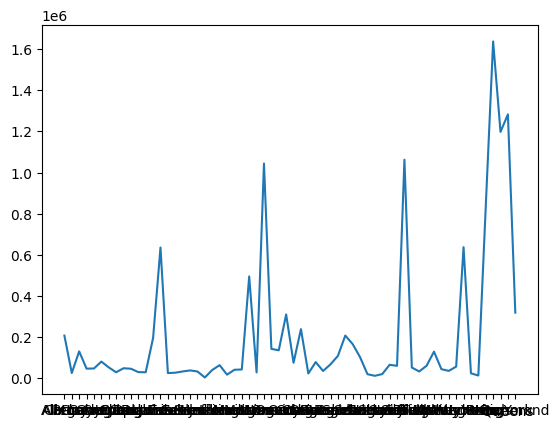

In [41]:
plt.plot(all_totals.COUNTY, all_totals['2019'])

plt.show()